In [1]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import scipy.stats as st
import re

In [2]:
# Get the data together from the csv
csvpath = os.path.join("ParseableData_Table-21.csv")
sex_type = ''
data = {
    'Year' : [],
    'Total' : [],
    'White' : [],
    'Black' : [],
    'Asian' : [],
    'Hispanic' : [],
    'Sex (M or F)' : []
}

with open(csvpath, newline='') as csvfile:
    csvread = csv.reader(csvfile, delimiter=',')
    
    for row in csvread:
        try:
            if row[0] in ['', 'Year']:
                next
            elif row[0] in ['Total', 'Women', 'Men']:
                sex_type = row[0]
            elif int(row[0]) in range(1979, 2020):
                data['Year'].append(int(row[0]))
                data['Total'].append(float(re.sub('[$,]', '', row[1])))
                data['White'].append(float(re.sub('[$,]', '', row[2])))
                data['Black'].append(float(re.sub('[$,]', '', row[3])))

                data['Asian'].append(float(re.sub('[$,]', '', row[4])) if "â€" not in row[4] else '\0')

                data['Hispanic'].append(float(re.sub('[$,]', '', row[5])))
                data['Sex (M or F)'].append(sex_type if sex_type in ['Women', 'Men'] else "Both")
        except ValueError:
            print(f"Skipping Row\n{row}\n")

Data_df = pd.DataFrame(data=data, columns=data.keys())
Data_df

Skipping Row
['ï»¿"Table 21. Inflation-adjusted median hourly earnings', ' by race and Hispanic or Latino ethnicity', ' for wage and salary workers paid hourly rates', ' 1979-2018 annual averages"', '', '', '', '', '']

Skipping Row
['[In constant 2018 dollars]', '', '', '', '', '']

Skipping Row
['Note: The comparability of historical labor force data has been affected at various times by methodological and other changes in the Current Population Survey (CPS). Information about historical comparability is online at https://www.bls.gov/cps/documentation.htm#comp. As of 2003, estimates for the race groups shown (White, Black or African American, and Asian) include people who selected that race group only; people who selected more than one race group are not included. Prior to 2003, people who reported more than one race were included in the group they identified as the main race. Asian data for 2000-2002 are for Asians and Pacific Islanders. As of 2003, Asians constitute a separate cate

,Year,Total,White,Black,Asian,Hispanic,Sex (M or F)
0,1979,14.37,14.60,13.30, ,13.20,Both
1,1980,14.01,14.19,12.91, ,12.91,Both
2,1981,13.70,13.78,13.03, ,12.79,Both
3,1982,13.53,13.71,12.68, ,12.56,Both
4,1983,13.44,13.61,12.38, ,12.24,Both
...,...,...,...,...,...,...,...
115,2014,15.28,15.77,12.96,15.56,13.14,Men
116,2015,15.56,15.83,13.43,15.77,13.70,Men
117,2016,15.65,15.83,13.66,15.73,14.47,Men
118,2017,15.57,16.18,13.67,17.06,14.72,Men


In [3]:
# Can't keep the non-numeric Asian data for proper analysis, so make two
# dataframes; one with and one without Asians
filtered_combined_data = Data_df.loc[Data_df['Asian'] != '\0']
filtered_nonAsian_data = Data_df.drop(columns=['Asian'])
filtered_Asian_data = filtered_combined_data.drop(columns=['Total', 'White', 'Black', 'Hispanic'])

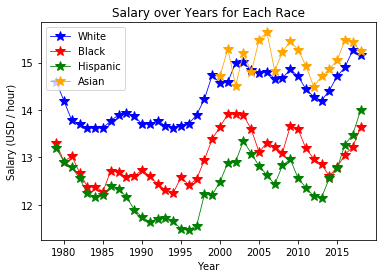

<Figure size 432x288 with 0 Axes>

In [4]:
# Make the plots; plots of lots!
both_sexes = filtered_nonAsian_data.loc[filtered_nonAsian_data['Sex (M or F)'] == 'Both']
both_sexes_asian = filtered_Asian_data.loc[filtered_Asian_data['Sex (M or F)'] == 'Both']

main_fig, main_plot = plt.subplots(sharex=True, sharey=True)
main_plot.set_title('Salary over Years for Each Race')
main_plot.set_xlabel('Year')
main_plot.set_ylabel('Salary (USD / hour)')
main_plot = plt.plot(
    [year for year in both_sexes['Year']],
    [salary for salary in both_sexes['White']],
    marker='*',
    color='blue',
    linewidth=0.8,
    markersize=10,
    label='White'
)
main_plot = plt.plot(
    [year for year in both_sexes['Year']],
    [salary for salary in both_sexes['Black']],
    marker='*',
    color='red',
    linewidth=0.8,
    markersize=10,
    label='Black'
)
main_plot = plt.plot(
    [year for year in both_sexes['Year']],
    [salary for salary in both_sexes['Hispanic']],
    marker='*',
    color='green',
    linewidth=0.8,
    markersize=10,
    label='Hispanic'
)
main_plot = plt.plot(
    [year for year in both_sexes_asian['Year']],
    [salary for salary in both_sexes_asian['Asian']],
    marker='*',
    color='orange',
    linewidth=0.8,
    markersize=10,
    label='Asian'
)
plt.legend()
plt.savefig(f'Save_Data/Race_Salaries.png')
plt.show()
plt.tight_layout()

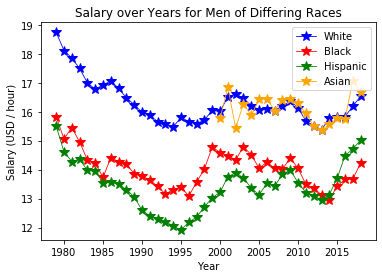

<Figure size 432x288 with 0 Axes>

In [5]:
male_sexes = filtered_nonAsian_data.loc[filtered_nonAsian_data['Sex (M or F)'] == 'Men']
male_sexes_asian = filtered_Asian_data.loc[filtered_Asian_data['Sex (M or F)'] == 'Men']

main_fig, main_plot = plt.subplots(sharex=True, sharey=True)
main_plot.set_title('Salary over Years for Men of Differing Races')
main_plot.set_xlabel('Year')
main_plot.set_ylabel('Salary (USD / hour)')
main_plot = plt.plot(
    [year for year in male_sexes['Year']],
    [salary for salary in male_sexes['White']],
    marker='*',
    color='blue',
    linewidth=0.8,
    markersize=10,
    label='White'
)
main_plot = plt.plot(
    [year for year in male_sexes['Year']],
    [salary for salary in male_sexes['Black']],
    marker='*',
    color='red',
    linewidth=0.8,
    markersize=10,
    label='Black'
)
main_plot = plt.plot(
    [year for year in male_sexes['Year']],
    [salary for salary in male_sexes['Hispanic']],
    marker='*',
    color='green',
    linewidth=0.8,
    markersize=10,
    label='Hispanic'
)
main_plot = plt.plot(
    [year for year in male_sexes_asian['Year']],
    [salary for salary in male_sexes_asian['Asian']],
    marker='*',
    color='orange',
    linewidth=0.8,
    markersize=10,
    label='Asian'
)
plt.legend()
plt.savefig(f'Save_Data/Male_Salaries.png')
plt.show()
plt.tight_layout()

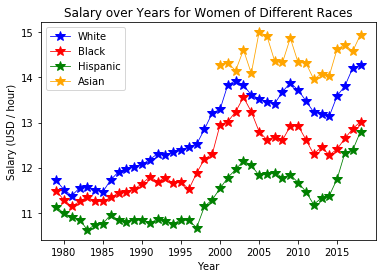

<Figure size 432x288 with 0 Axes>

In [6]:
female_sexes = filtered_nonAsian_data.loc[filtered_nonAsian_data['Sex (M or F)'] == 'Women']
female_sexes_asian = filtered_Asian_data.loc[filtered_Asian_data['Sex (M or F)'] == 'Women']

main_fig, main_plot = plt.subplots(sharex=True, sharey=True)
main_plot.set_title('Salary over Years for Women of Different Races')
main_plot.set_xlabel('Year')
main_plot.set_ylabel('Salary (USD / hour)')
main_plot = plt.plot(
    [year for year in female_sexes['Year']],
    [salary for salary in female_sexes['White']],
    marker='*',
    color='blue',
    linewidth=0.8,
    markersize=10,
    label='White'
)
main_plot = plt.plot(
    [year for year in female_sexes['Year']],
    [salary for salary in female_sexes['Black']],
    marker='*',
    color='red',
    linewidth=0.8,
    markersize=10,
    label='Black'
)
main_plot = plt.plot(
    [year for year in female_sexes['Year']],
    [salary for salary in female_sexes['Hispanic']],
    marker='*',
    color='green',
    linewidth=0.8,
    markersize=10,
    label='Hispanic'
)
main_plot = plt.plot(
    [year for year in female_sexes_asian['Year']],
    [salary for salary in female_sexes_asian['Asian']],
    marker='*',
    color='orange',
    linewidth=0.8,
    markersize=10,
    label='Asian'
)
plt.legend()
plt.savefig(f'Save_Data/Female_Salaries.png')
plt.show()
plt.tight_layout()

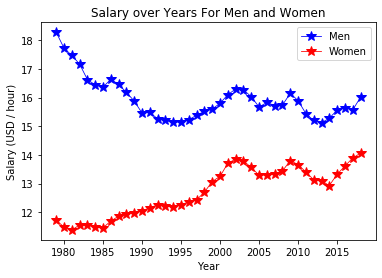

<Figure size 432x288 with 0 Axes>

In [7]:
main_fig, main_plot = plt.subplots(sharex=True, sharey=True)
main_plot.set_title('Salary over Years For Men and Women')
main_plot.set_xlabel('Year')
main_plot.set_ylabel('Salary (USD / hour)')
main_plot = plt.plot(
    [year for year in male_sexes['Year']],
    [salary for salary in male_sexes['Total']],
    marker='*',
    color='blue',
    linewidth=0.8,
    markersize=10,
    label='Men'
)
main_plot = plt.plot(
    [year for year in female_sexes['Year']],
    [salary for salary in female_sexes['Total']],
    marker='*',
    color='red',
    linewidth=0.8,
    markersize=10,
    label='Women'
)
plt.legend()
plt.savefig(f'Save_Data/Both_Sex_Salaries.png')
plt.show()
plt.tight_layout()